In [1]:
import jieba
import gensim
from sklearn.manifold import TSNE
import numpy as np
jieba.set_dictionary("./dict.txt.big")

In [2]:
raw_sentences = []
with open("../data/visualize_embed/all_sents.txt", "r") as f:
    for line in f:
        raw_sentences.append(line)

In [3]:
sentences = list(map(lambda x: jieba.lcut(x), raw_sentences))

Building prefix dict from /nfs/home/jimlin7777/ML2017/hw6/visualize_code/dict.txt.big ...
Loading model from cache /tmp/jieba.uae120202fa7dea71bc57d0fb212ae407.cache
Loading model cost 1.381 seconds.
Prefix dict has been built succesfully.


In [26]:
model = gensim.models.Word2Vec(sentences, size=100, window=7, min_count=5, workers=20, iter=50)

In [27]:
wv_arr = [model.wv[word] for word in model.wv.index2word]
wv_arr = np.array(wv_arr)
wv_arr.shape

(31430, 100)

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
reduced_wv = tsne.fit_transform(wv_arr)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 31430 samples in 0.126s...
[t-SNE] Computed neighbors for 31430 samples in 264.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31430
[t-SNE] Computed conditional probabilities for sample 2000 / 31430
[t-SNE] Computed conditional probabilities for sample 3000 / 31430
[t-SNE] Computed conditional probabilities for sample 4000 / 31430
[t-SNE] Computed conditional probabilities for sample 5000 / 31430
[t-SNE] Computed conditional probabilities for sample 6000 / 31430
[t-SNE] Computed conditional probabilities for sample 7000 / 31430
[t-SNE] Computed conditional probabilities for sample 8000 / 31430
[t-SNE] Computed conditional probabilities for sample 9000 / 31430
[t-SNE] Computed conditional probabilities for sample 10000 / 31430
[t-SNE] Computed conditional probabilities for sample 11000 / 31430
[t-SNE] Computed conditional probabilities for sample 12000 / 31430
[t-SNE] Computed conditional probabilities for 

In [22]:
K = 8000
wordcount_greater_than_K_index = [i for i, word in enumerate(model.wv.index2word) if model.wv.vocab[word].count>K]
word_greater_than_K = [word for word in model.wv.index2word if model.wv.vocab[word].count>K]

In [23]:
import pickle
import matplotlib.pyplot as plt 
from adjustText import adjust_text
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

Text(0.5,0,'橫坐標')

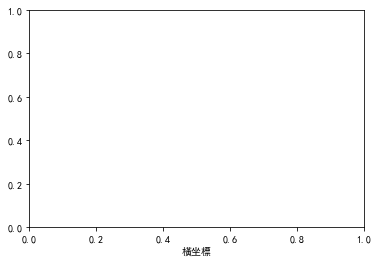

In [24]:
plt.xlabel(u"橫坐標")

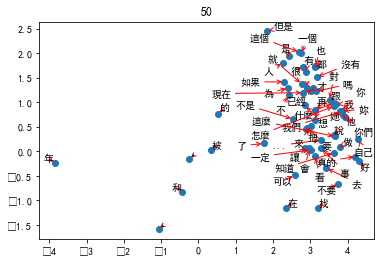

In [25]:
X = reduced_wv[wordcount_greater_than_K_index,0].copy()
Y = reduced_wv[wordcount_greater_than_K_index,1].copy()
plt.plot(X, Y, "o")
texts = [plt.text(x, y, text) for x, y, text in zip(X, Y, word_greater_than_K)]
plt.title(str(adjust_text(texts, X, Y, arrowprops=dict(arrowstyle="->", color="red"))))
plt.show()

In [21]:
model.wv.most_similar(positive=['爸爸', '媽媽'], negative=['爸'])


[('哥哥', 0.5011773109436035),
 ('我', 0.4654076099395752),
 ('弟弟', 0.44119077920913696),
 ('姊姊', 0.4388927221298218),
 ('她', 0.4361691176891327),
 ('爸爸媽媽', 0.43413424491882324),
 ('丈夫', 0.432756245136261),
 ('婆婆', 0.41703084111213684),
 ('妹妹', 0.4128608703613281),
 ('男朋友', 0.4120672941207886)]

TypeError: a bytes-like object is required, not 'str'